# Lab 7.3: Introduction to Logistic Regression

**Question 1**

1) Write a Python function that computes the value of the logistic function.  

2) Define an array of values from -6 to 6 (using `numpy.linspace`), use the logistic function to obtain the probabilites, and plot the values (x) against the probabilities (y).
  

In [1]:
%pylab inline

import yaml
from sqlalchemy import create_engine

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


#### 1

In [2]:
def logistic(x):
    return exp(x)/(1 + exp(x))

#### 2

In [3]:
x = np.linspace(-6,6,100)
y = logistic(x)

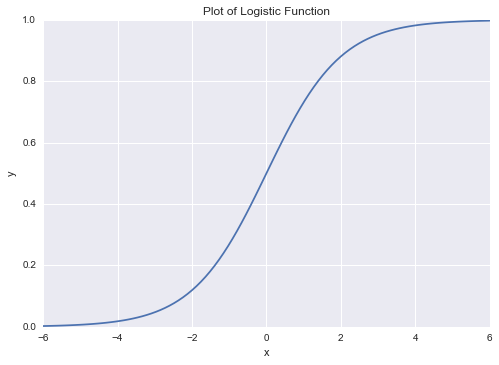

In [4]:
title("Plot of Logistic Function")
xlabel("x")
ylabel("y")
plt.plot(x,y);

**Question 2**

You are given a data set with a binary response (`Shot`) in the `flu` table. The response of 1 represents people who have taken flu shots, 0 represents people who have not. `Age` represents the the age of the person and `Health_aware` is a score of how health aware the person is.


1) As usual, make plots to explore your data. By inspecting the scatter matrix, guess if people who are more health aware would be more likely to have got flu shots and if people who are old would be more likely to have got flu shots.


2) Why would it be inappropriate to use linear regression for this problem ?

   
3) Fit the data to a logistic regression model. Logistic regression is fitted in a similar manner in Python as linear regression, except the function we use is `Logit`.
  
 
4) Do the regression coefficients confirm your guesses in Part 1)? Why or why not?   

5) How would you interpret the regression coefficients?

In [5]:
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

In [6]:
flu = pd.read_sql("SELECT * FROM flu;", engine)
flu.head()

,patient_id,Shot,Age,Health_aware
0,0,0.0,38.0,40.0
1,1,1.0,52.0,60.0
2,2,0.0,41.0,36.0
3,3,1.0,46.0,59.0
4,4,1.0,41.0,70.0


In [7]:
flu.count()

patient_id      50
Shot            50
Age             50
Health_aware    50
dtype: int64

#### 1

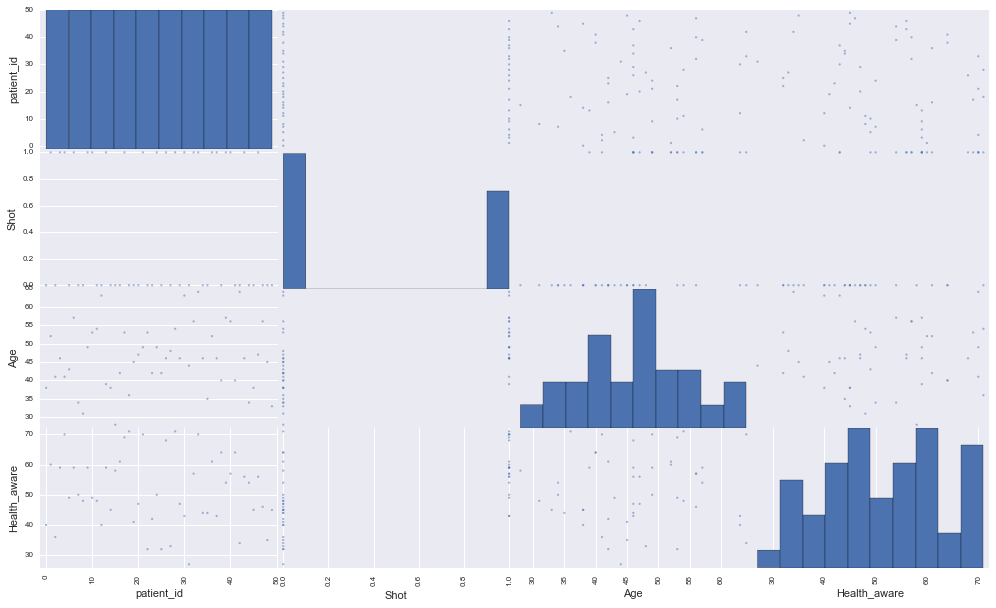

In [8]:
pd.scatter_matrix(flu, figsize=(17, 10), edgecolor='none', alpha=0.5);

It's hard to tell from the plot, but we would expect that if you are health aware, you would be more likely to get a shot, and same applies to age: the older you are, you would be more likely to get a shot.

#### 2

Linear regression is not indicated because we are dealing with a binary variable (`shot`).

#### 3

In [9]:
logit_model = smf.logit("Shot ~ Health_aware + Age", data=flu).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.324163
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.5235
Time:                        15:20:59   Log-Likelihood:                -16.208
converged:                       True   LL-Null:                       -34.015
                                        LLR p-value:                 1.848e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.5846      6.418     -3.363      0.001     -34.164      -9.005
Health_aware     0.2035      0.063      3.244      0.001       0.081       0.326
Age              0.2218      0.074      2.983      0.003       0.076       0.368
================================================================================
"""

#### 4

Yes because they have positive coefficients.

#### 5

$y = -21.5846 + 0.2035 * Health\_aware + 0.2218 * Age$

In [10]:
health_aware = 50
age = 50
y = logit_model.params[0] + logit_model.params[1] * health_aware + logit_model.params[2] * age
print("There's a " + str(logistic(y) * 100) + "% probability of getting a shot given that you are " + str(health_aware) + " health aware and of age " + str(age) +".")

There's a 42.0578302752% probability of getting a shot given that you are 50 health aware and of age 50.


**Question 3**  

The data set https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv has data on 61 married couples. The dependent variable is HAPPYMAR, respondent’s marital happiness (1 = Very Happy, 0 = Otherwise). CHURCH, Church attendance (1 = Often attends, 0 = other), FEMALE (1 = female, 0 = male), and EDUC, Years of education, are the explanatory variables.  

1) Run the logistic regression of happymar on church, female and educ.  

2) Are all three explanatory variables needed in the model?  

3) Based on the signs of the logistic regression coefficients (positive or negative), interpret their impact on the probability of a happy marriage. Any surprises?  

4) Determine the probability of marital happiness for: (a) a male with 8 years of education who is not a regular churchgoer (b) a male with 8 years of education who is a regular churchgoer (c) a female with 16 years of education who is not a regular churchgoer (d) a female with 16 years of education who is a regular churchgoer. 

In [11]:
marry = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv')
marry.head()

,happymar,church,female,educ
0,0,0,0,9
1,1,0,1,10
2,1,1,1,16
3,1,1,1,11
4,1,1,1,12


In [12]:
marry.count()

happymar    61
church      61
female      61
educ        61
dtype: int64

#### 1

In [13]:
marry_logit_model = smf.logit("happymar ~ church + female + educ", data=marry).fit()
marry_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.403833
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               happymar   No. Observations:                   61
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.3823
Time:                        15:20:59   Log-Likelihood:                -24.634
converged:                       True   LL-Null:                       -39.881
                                        LLR p-value:                 1.086e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1586      3.285     -2.483      0.013     -14.598      -1.719
church         2.9075      0.921      3.158      0.002       1.103       4.712
female         2.3945      0.877      2.729      0.006       0.675       4.114
educ           0.5267      0.265      1.986      0.047       0.007       1.046
==============================================================================
"""

#### 2

With a significance level of 0.05, the variable `educ` has a p-value really close to the threshold of failing to reject the null hypothesis that the coefficient for `educ` is not significant.

#### 3

Nor surprises. Even if you are in a miserable marriage, the fact that you go to church makes you feel extremely guilty about admitting you are a in a bad marriage. Also, it seems that if you are female, you have a more positive outlook to marriage.

Education does not have a big impact on the happiness of the marriage.

#### 4

In [14]:
# a male with 8 years of education who is not a regular churchgoer.
church = 0
female = 0
educ = 8

y = marry_logit_model.params[0] + marry_logit_model.params[1] * church + marry_logit_model.params[2] * female + marry_logit_model.params[3] * educ
print("There's a " + str(logistic(y) * 100) + "% probability.")

There's a 1.89825859537% probability.


In [15]:
# a male with 8 years of education who is a regular churchgoer.
church = 1
female = 0
educ = 8

y = marry_logit_model.params[0] + marry_logit_model.params[1] * church + marry_logit_model.params[2] * female + marry_logit_model.params[3] * educ
print("There's a " + str(logistic(y) * 100) + "% probability.")

There's a 26.1626797989% probability.


In [16]:
# a female with 16 years of education who is not a regular churchgoer.
church = 0
female = 1
educ = 16

y = marry_logit_model.params[0] + marry_logit_model.params[1] * church + marry_logit_model.params[2] * female + marry_logit_model.params[3] * educ
print("There's a " + str(logistic(y) * 100) + "% probability.")

There's a 93.4803713912% probability.


In [17]:
# a female with 16 years of education who is a regular churchgoer.
church = 1
female = 1
educ = 16

y = marry_logit_model.params[0] + marry_logit_model.params[1] * church + marry_logit_model.params[2] * female + marry_logit_model.params[3] * educ
print("There's a " + str(logistic(y) * 100) + "% probability.")

There's a 99.6205768384% probability.
